## Web Scraping Lab 1:


### Prepare your project:

#### Business goal:

Make sure you've understood the big picture of your project: the goal of the company (Gnod), their current product (Gnoosic), their strategy, and how your project fits into this context. Re-read the business case and the e-mail from the CTO, take a look at the flowchart and create an initial Trello board with the tasks you think you'll have to acomplish.

#### Scraping popular songs:

Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputed song, but the CTO thinks that if the song is on the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.

You have find data on the internet about currently popular songs. Billboard mantains a weekly Top 100 of "hot" songs here: https://www.billboard.com/charts/hot-100. 

It's a good place to start! Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random

# 2. find url and store it in avariable
url = "https://www.billboard.com/charts/hot-100"

# 3. download html with a get request
response = requests.get(url)

In [4]:
#check response status code 
response.status_code

200

In [5]:
#parse and store the contents of the url call
soup=BeautifulSoup(response.content, 'html.parser')

In [6]:
#prettify the soup 
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 
print(soup.prettify)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
#Miguel's solution: using CSS

songs = soup.select('button > span.chart-element__information > span.chart-element__information__song.text--truncate.color--primary')

In [8]:
titles=[]
artists=[]

for i in soup.find_all('span', {'class':'chart-element__information__song'}):
    titles.append(i.get_text())

for i in soup.find_all('span', {'class':'chart-element__information__artist'}):
    artists.append(i.get_text())

In [9]:
len(titles)

100

In [10]:
len(artists)

100

In [11]:
top_100_hot_songs=pd.DataFrame({'Title':titles, 'Artist':artists})

In [12]:
top_100_hot_songs

,Title,Artist
0,Butter,BTS
1,Good 4 U,Olivia Rodrigo
2,Levitating,Dua Lipa Featuring DaBaby
3,Kiss Me More,Doja Cat Featuring SZA
4,Montero (Call Me By Your Name),Lil Nas X
...,...,...
95,All I Know So Far,P!nk
96,What's Next,Drake
97,Enough For You,Olivia Rodrigo
98,Juggernaut,"Tyler, The Creator Featuring Lil Uzi Vert & Ph..."


### Bonus

Can you find other websites with lists of "hot" songs? What about songs that were popular on a certain decade? 

You can scrape more lists and add extra features to the project.

In [13]:
#create another column with age 2010 and then append rows from other scrapped charts
#and make entries: top 2001 x exemple. Thats one way

#another in which charts the songs have appeared?

#no podem posar current per les de ara xq llavors es torna un objecte, un string.
#If these borads release every month podem posar the date of the release

In [14]:

# 2. find url and store it in avariable
url = "http://www.discjockey.org/top-100-songs-of-the-1980s/"

# 3. download html with a get request
response = requests.get(url)

In [15]:
response.status_code

200

In [16]:
#parse and store the contents of the url call
soup2=BeautifulSoup(response.content, 'html.parser')

In [17]:
#prettify the soup
print(soup2.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <title>
   Top 100 Songs of the 1980s - Chicago DJ Fourth Estate Audio
  </title>
  <meta content="Top 100 songs of the 1980s - Chicago DJ Fourth Estate Audio" name="description"/>
  <meta content="Chicago DJ Fourth Estate Audio Presents the Top Songs of the 1980s" name="keywords"/>
  Chicago DJ,Chicago Wedding DJ,Fourth Estate Audio,Top Songs of the 1980s
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="p0oIwbkp79V1fHXzfr6krKOff3OLHM1I3VUKcHEQx4c" name="google-site-verification"/>
  <script src="/site/template/assets/functions.js">
  </script>
  <script src="/site/template/assets/rollover.js">
  </script>
  <script src="/site/epage/assets/newwindow.js">
  </script>
  <link href="/site/template/assets/home_template_fourthestate_895/css/template0.css?v=2" id="templatecss" media="screen" rel="stylesheet" type="text/css"/>
  <link href="/site/template/assets/home_template_fourthestate_895/css/layou

In [18]:
top_80s_songs = []
top_80s_artists = []

for q in soup2.select('td:nth-child(2)'):
    top_80s_songs.append(q.get_text())

for q in soup2.select("td:nth-child(3)"):
    top_80s_artists.append(q.get_text())

In [19]:
len(top_80s_songs)

100

In [20]:
len(top_80s_artists)

99

In [21]:
#we remove the last song as it has no artist
# pop deletes the last element of a column
top_80s_songs.pop()

'Strokin'

In [22]:
len(top_80s_songs)

99

In [23]:
hits_80s=pd.DataFrame({"title_80":top_80s_songs, "artist_80":top_80s_artists})

In [24]:
hits_80s

,title_80,artist_80
0,Don't Stop Believin',Journey
1,You Shook Me All Night Long,AC/DC
2,Love Shack,B-52's
3,Livin' On A Prayer,Bon Jovi
4,Pour Some Sugar On Me,Def Leppard
...,...,...
94,Tainted Love,Soft Cell
95,Heaven,Bryan Adams
96,Here And Now,Luther Vandross
97,Nothin' But A Good Time,Poison


# Creating the recommender

In [25]:
import random

In [26]:
#top_100_songs['Title'].values

In [27]:
#def song_choice():
 #   song = input('Which song do you like? ')
    #  if song in top_100_songs['Title'].values:
   #     print('Oh, nice one! We reccomend you to listen to:', random.choice(top_100_songs['Title']))
  #  else:
   #     print('This song is not hot, try another song so we can give you a recommendation')

In [28]:
# song_choice()

In [29]:

def billboard_scraper():
    from bs4 import BeautifulSoup
    import requests
    import pandas as pd
    import random
    # 2. find url and store it in avariable
    url = "https://www.billboard.com/charts/hot-100"
    # 3. download html with a get request
    response = requests.get(url)
    soup=BeautifulSoup(response.content, 'html.parser')
    titles=[]
    artists=[]
    for i in soup.find_all('span', {'class':'chart-element__information__song'}):
        titles.append(i.get_text())
    for i in soup.find_all('span', {'class':'chart-element__information__artist'}):
        artists.append(i.get_text())
    return pd.DataFrame({'song':titles, 'artist':artists})

In [30]:
# Create the prototype
def hits_80s_scraper():

    # 2. find url and store it in avariable
    url = "http://www.discjockey.org/top-100-songs-of-the-1980s/"

    # 3. download html with a get request
    response = requests.get(url)
    soup=BeautifulSoup(response.content, 'html.parser')
    
    top_80s_songs = []
    top_80s_artists = []

    for q in soup2.select('td:nth-child(2)'):
        top_80s_songs.append(q.get_text())

    for q in soup2.select("td:nth-child(3)"):
        top_80s_artists.append(q.get_text())
    
    top_80s_songs.pop()
    
    return pd.DataFrame({"title_80":top_80s_songs, "artist_80":top_80s_artists})

In [31]:
from random import randint

In [32]:
def hot_recommender():
    from billboard_scraper import billboard_scraper

billboard = billboard_scraper()

song = input("What song do you like?")

song_row = billboard[billboard["song"].str.contains(song)]
if len(song_row) == 0 :
    print("That song is not in the list")
else:
    check_song = input("did you mean " + song_row["song"].values[0] + "by " + song_row["artist"].values[0]+"? ")
    
    if check_song == 'yes':
            print("That's a hot song")
            random_song = randint(0, len(billboard)-1)
            print("You might also like " + billboard["song"][random_song] + "by " + billboard["artist"][random_song])
    else:
            print("Ah, not the one I had in mind")

What song do you like?Butter
did you mean Butterby BTS? yes
That's a hot song
You might also like Rapstarby Polo G


## 80s from spotify

In [33]:
import getpass

In [34]:
client_id=str(getpass.getpass('client_id?'))
client_secret = str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [35]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials

In [36]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret))

In [37]:
# https://open.spotify.com/playlist/3acAVwCcB38UtE24t92tex?si=e39ecf230a2f4177



In [38]:
playlist = sp.user_playlist_tracks("spotify", "3acAVwCcB38UtE24t92tex")
#esta funcion solo devuelve hasta 100 canciones!


In [39]:
#para q me salgan todos los resultados hago:

def get_playlist_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [40]:
# 2- call function on playlist
full_playlist= get_playlist_tracks('spotify', '3acAVwCcB38UtE24t92tex')

In [41]:
full_playlist

[{'added_at': '2017-01-27T15:49:54Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/tomdavis19'},
   'href': 'https://api.spotify.com/v1/users/tomdavis19',
   'id': 'tomdavis19',
   'type': 'user',
   'uri': 'spotify:user:tomdavis19'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0lZoBs4Pzo7R89JM9lxwoT'},
      'href': 'https://api.spotify.com/v1/artists/0lZoBs4Pzo7R89JM9lxwoT',
      'id': '0lZoBs4Pzo7R89JM9lxwoT',
      'name': 'Duran Duran',
      'type': 'artist',
      'uri': 'spotify:artist:0lZoBs4Pzo7R89JM9lxwoT'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BW',
     'BY',
     'BZ',
     'CA',

In [42]:
len(full_playlist)

151

#### Exploring the playlist

In [43]:
full_playlist[0].keys()
#info for each track

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [44]:
full_playlist[0]['track'].keys()
# = playlist['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

#### Extracting track ids and artist ids

In [46]:
def get_track_ids_from_playlist(playlist):
    track_id=[]
    for item in playlist:
        track_id.append(item['track']['id'])
    
    return track_id

In [49]:
# Testing function:

get_track_ids_from_playlist(full_playlist)

['39lSeqnyjZJejRuaREfyLL',
 '7w4Tbkbx081vRJa8ol56Qf',
 '5lmYpa6EaVAKAlwxMf7q5c',
 '0HEmnAUT8PHznIAAmVXqFJ',
 '7jtGa7FmUx7YxTbiy6tEsX',
 '3X7abqSXC4xrxuC1ykpWcY',
 '6qUEOWqOzu1rLPUPQ1ECpx',
 '2dzMbi6uW2EE4cgzxf8vcO',
 '7n1sAeis4HONDsNnnqmtaU',
 '37BTh5g05cxBIRYMbw8g2T',
 '77NNZQSqzLNqh2A9JhLRkg',
 '5Du6gEDduLCB9FIm9xIE4w',
 '0qi4b1l0eT3jpzeNHeFXDT',
 '3KuAa8Y79xlfJgYtBKbynY',
 '6A8OnjnpShshNpcqWtZRjr',
 '0ikz6tENMONtK6qGkOrU3c',
 '7GhIk7Il098yCjg4BQjzvb',
 '7N3PAbqfTjSEU1edb2tY8j',
 '4RvWPyQ5RL0ao9LPZeSouE',
 '6W2VbtvMrDXm5vYeB7amkO',
 '2I3jWxB1atY6KAnwnIZbcD',
 '5ZEKq8JRtVVXZXEZ9eI9Wf',
 '3AgvZyLH4sWkII5bnU80aQ',
 '5eU8qMd0TpaLqTGDZJaLDs',
 '15MJ5NThPjj6xhPcts8MiY',
 '11IzgLRXV7Cgek3tEgGgjw',
 '4kjgGgDbNN4nR3OZYuRkUe',
 '6KqWBiEZxRmPPGDc0PkRoV',
 '45oFq8ZKV9KDhzYb2Rh1y4',
 '5TgD3Wh5ZUZnUU4tmVvJbx',
 '5prTs2HAw2G4idHZyeFp8o',
 '7HKxTNVlkHsfMLhigmhC0I',
 '084PXFhuurZHjsjgdwQci6',
 '6t1FIJlZWTQfIZhsGjaulM',
 '3U7H63zKWLjOuFZJUmTowp',
 '57JVGBtBLCfHw2muk5416J',
 '0DhTXf8sZ1ahNpPD9ibmge',
 

In [50]:
def get_artist_ids_from_playlist(playlist):
    artist_id=[]
    for item in full_playlist:
        artist_id.append(item['track']['artists'][0]['id'])
    
    return artist_id

In [53]:
# Testing function:

get_artist_ids_from_playlist(full_playlist)

['0lZoBs4Pzo7R89JM9lxwoT',
 '0WwSkZ7LtFUFjGjMZBMt6T',
 '1aX2dmV8XoHYCOQRxjPESG',
 '19ra5tSw0tWufvUp8GotLo',
 '6hN9F0iuULZYWXppob22Aj',
 '58lV9VcRSjABbAbfWS6skp',
 '3CQIn7N5CuRDP8wEI7FiDA',
 '3fMbdgg4jU18AjLCKBhRSm',
 '2TzHIUhVpeeDxyJPpQfnV3',
 '0PFtn5NtBbbUNbU9EAmIWF',
 '0rvjqX7ttXeg3mTy8Xscbt',
 '6aq8T2RcspxVOGgMrTzjWc',
 '762310PdDnwsDxAQxzQkfX',
 '1G1mX30GpUJqOr1QU2eBSs',
 '6tbjWDEIzxoDsBA1FuhfPW',
 '5lpH0xAS4fVfLkACg9DAuM',
 '0gxyHStUsqpMadRV0Di1Qt',
 '2cnMpRsOVqtPMfq7YiFE6K',
 '4bthk9UfsYUYdcFyqxmSUU',
 '3Y3xIwWyq5wnNHPp5gPjOW',
 '20p5D2KrE8CGuOjHtxsyTp',
 '51l0uqRxGaczYr4271pVIC',
 '2kreKea2n96dXjcyAU9j5N',
 '1eClJfHLoDI4rZe5HxzBFv',
 '2aS6jYh7ysTL1ZUsHneNgM',
 '1dfeR4HaWDbWqFHLkxsg1d',
 '3gMaNLQm7D9MornNILzdSl',
 '3sc7iUG1Wwpwx7bHeZolgx',
 '771qBvjnXOH9Azr6lKy6FB',
 '19xz1vcuKNjniGEftTOSSH',
 '0SD4eZCN4Kr0wQk56hCdh2',
 '4tpUmLEVLCGFr93o8hFFIB',
 '51l0uqRxGaczYr4271pVIC',
 '057gc1fxmJ2vkctjQJ7Tal',
 '58lV9VcRSjABbAbfWS6skp',
 '1dfeR4HaWDbWqFHLkxsg1d',
 '0LyfQWJT6nXafLPZqxe9Of',
 

#### Removing duplicated artist ids

In [127]:
artist_ids = get_artist_ids_from_playlist(full_playlist)
artist_ids = list(dict.fromkeys(artist_ids))
len(artist_ids)

93

#### Get all songs from each artist

- In order to get all songs from an artist, we first need to get all albums. Then, we will get all songs from each album

##### Get album ids

In [148]:
def get_ablum_names_from_artist_ids(artist_ids):
    
    album_names = []
    for i in artist_ids:
        albums_info = sp.artist_albums(i, album_type='album')
        albums_info_items = albums_info['items']
        # print(albums_info_items)   --->  [{'album_group': 'album', 'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0lZoBs4Pzo7R89JM9lxwoT'}, 'href': 'https://api.spotify.com/v1/artists/0lZoBs4Pzo7R89JM9lxwoT', 'id': '0lZoBs4Pzo7R89JM9lxwoT', 'name': 'Duran Duran',
        while albums_info['next']:
            albums_info = sp.next(albums_info)
            albums_info_items.extend(albums_info['items'])
        for i in albums_info_items:
            album_names.append(i['name'])
    
    return album_names

In [155]:
def get_ablum_ids_from_artist_ids(artist_ids):
    
    album_ids=[]
    for i in artist_ids:
        albums_info = sp.artist_albums(i, album_type='album')
        albums_info_items = albums_info['items']
        # print(albums_info_items)   --->  [{'album_group': 'album', 'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0lZoBs4Pzo7R89JM9lxwoT'}, 'href': 'https://api.spotify.com/v1/artists/0lZoBs4Pzo7R89JM9lxwoT', 'id': '0lZoBs4Pzo7R89JM9lxwoT', 'name': 'Duran Duran',
        while albums_info['next']:
            albums_info = sp.next(albums_info)
            albums_info_items.extend(albums_info['items'])
        for i in albums_info_items:
            album_ids.append(i['id'])
    
    return album_ids

In [156]:
len(get_ablum_ids_from_artist_ids(artist_ids))

2240

#### Removing duplicated album ids

In [151]:
album_ids = get_ablum_ids_from_artist_ids(artist_ids)
album_ids = list(dict.fromkeys(album_ids))
len(album_ids)

2238

##### Get all song names from album ids

In [157]:
def get_song_names_from_album_ids(album_ids):
    
    song_names=[]
    for i in album_ids:
        albums_tracks= sp.album_tracks(i)
        albums_tracks_items = albums_tracks['items']
        # print(albums_info_items)   --->  [{'album_group': 'album', 'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0lZoBs4Pzo7R89JM9lxwoT'}, 'href': 'https://api.spotify.com/v1/artists/0lZoBs4Pzo7R89JM9lxwoT', 'id': '0lZoBs4Pzo7R89JM9lxwoT', 'name': 'Duran Duran',
        while albums_tracks['next']:
            albums_tracks = sp.next(albums_tracks)
            albums_tracks_items.extend(albums_tracks['items'])
        for i in albums_tracks_items:
            song_names.append(i['name'])
    
    return song_names

In [159]:
len(get_song_names_from_album_ids(album_ids))

34243

### Get track id, artist id, audio features of all 34.243 songs

In [173]:
def get_song_ids_from_album_ids(album_ids):
    
    song_ids=[]
    for i in album_ids:
        albums_tracks= sp.album_tracks(i)
        albums_tracks_items = albums_tracks['items']
        # print(albums_info_items)   --->  [{'album_group': 'album', 'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0lZoBs4Pzo7R89JM9lxwoT'}, 'href': 'https://api.spotify.com/v1/artists/0lZoBs4Pzo7R89JM9lxwoT', 'id': '0lZoBs4Pzo7R89JM9lxwoT', 'name': 'Duran Duran',
        while albums_tracks['next']:
            albums_tracks = sp.next(albums_tracks)
            albums_tracks_items.extend(albums_tracks['items'])
        for i in albums_tracks_items:
            song_ids.append(i['id'])
    
    return song_ids

In [253]:
song_ids = get_song_ids_from_album_ids(album_ids)

In [161]:
#02tfQwJSOLP77oCd9U8bqm --> duran duran album: Rio(Collectors Edition)

#39lSeqnyjZJejRuaREfyLL --> duran duran song: hungry like a wolf

In [210]:
songs_100 = song_ids[0:50]

In [233]:
songs_500 = song_ids[0:500]

sp.tracks function can only take 51 songs!

In [177]:
#info_all_tracks = sp.tracks(['39lSeqnyjZJejRuaREfyLL'])

In [225]:
info_all_tracks = sp.tracks(songs_100)

#### Splittingg the 34243 songs into groups of 50

In [287]:
def track_chunks(song_ids):
    chunks = [song_ids[x:x+100] for x in range(0, len(song_ids), 100)]
    return chunks

In [289]:
#track_chunks(song_ids)

In [268]:
# just taking the 1st artist:

def first_artist_name_from_song_ids_complete (song_ids):
    
    chunks = track_chunks(song_ids)
    
    artist_names = []
    
    for i in chunks:
        track_info = sp.tracks(i)
        track_info_track = track_info['tracks']
        
        for i in track_info_track:
            artist_names.append(i['artists'][0]['name'])
        
        
    return artist_names

In [270]:
len(first_artist_name_from_song_ids_complete(song_ids))

34243

In [256]:
len(song_ids)

34243

In [271]:
#def artist_ids_from_song_ids_complete (song_ids):
    
#    chunks = track_chunks(song_ids)
    
#    artist_names = []
    
#    for i in chunks:
#        track_info = sp.tracks(i)
#        track_info_track = track_info['tracks']
        
#        for i in track_info_track:
#            track_artist = i['artists']
            
#            for i in track_artist:
#                artist_names.append(i['name'])
        
        
#   return artist_names

#### Dataframe of songs and artists

In [272]:
titles = get_song_names_from_album_ids(album_ids)

In [273]:
artists = first_artist_name_from_song_ids_complete(song_ids)

In [274]:
d = list(zip(titles,artists))
titles_artists_df = pd.DataFrame(d, columns=['title','artist'])

In [277]:
titles_artists_df.head()

,title,artist
0,Opening - Live,Duran Duran
1,Intro - Live,Duran Duran
2,Medazzaland - Live,Duran Duran
3,Big Bang Generation - Live,Duran Duran
4,Hungry Like the Wolf - Live,Duran Duran


In [276]:
titles_artists_df.shape

(34243, 2)

### Audio features

In [282]:
titles_artists_df_100 = titles_artists_df[: 100]

In [283]:
titles_artists_df_100

,title,artist
0,Opening - Live,Duran Duran
1,Intro - Live,Duran Duran
2,Medazzaland - Live,Duran Duran
3,Big Bang Generation - Live,Duran Duran
4,Hungry Like the Wolf - Live,Duran Duran
...,...,...
95,The Man Who Stole A Leopard,Duran Duran
96,Other People's Lives,Duran Duran
97,Mediterranea,Duran Duran
98,Too Bad You're So Beautiful,Duran Duran


In [284]:
audio_feat_df=pd.DataFrame(sp.audio_features(tracks=songs_100))

In [290]:
#audio_feat_df

 Audio features only works for 100 elements, so we have to split our dataset into chunks of 100


### Function to apply audio features to 31.243 songs

In [ ]:
def audio_features_from_song_ids(song_ids):
    
    chunks = track_chunks(song_ids)
    
    artist_names = []
    
    for i in chunks:
        track_info = sp.tracks(i)
        track_info_track = track_info['tracks']
        
        for i in track_info_track:
            artist_names.append(i['artists'][0]['name'])
        
        
    return artist_names

In [47]:
#audio features is not working because we have more than 100 tracks
#so we will do it later once we get the final list of songs and do a for loop to apply this
#function every 100 songs

#audio_feat=sp.audio_features(tracks=track_id)
#import pandas as pd 
#audio_feat_df=pd.DataFrame(sp.audio_features(tracks=track_id))

In [49]:
list_test=[get_albums_info_from_artist(['0lZoBs4Pzo7R89JM9lxwoT', '0WwSkZ7LtFUFjGjMZBMt6T'])]

In [53]:
#GOOD def get_albums_info_from_artist(artist_id):
albums_info=[]
for i in artist_id:
    albums_info.append(sp.artist_albums(i, album_type='album'))
   
# albums_info[0]['items'][0]['id']

albums_id=[]
for item in albums_info:
    albums_id.append(item['items'][''])

TypeError: list indices must be integers or slices, not str

In [ ]:
albums_info

In [ ]:
albums_info[0]['items'][0]['id']

In [ ]:
albums_info[0]['items']

In [ ]:
len(albums_info[0]['items'])

In [ ]:
albums_info[0]['items'][0].keys()

In [ ]:
albums_info[0]['items'][0]['name']

In [ ]:
for i in albums_info[0]['items']:
    print(i['name'])

In [ ]:
albums_info[0]['items'][0]['id']

In [ ]:
def get_albums_from_artist(artist_id):
    for i in artist_id:
        return sp.artist_albums(i, album_type='album')

In [ ]:
#playlist

In [ ]:
#playlist['total']

In [ ]:
#playlist.keys()

In [ ]:
#playlist['items'][0]['track'].keys()

#si playlist tiene más de 100 canciones, no da xq el limite es 100

In [ ]:
#playlist['items'][0]['track']['album']

In [ ]:
# Function to extract just the song titles:

#playlist_80s_titles=[]
#for item in playlist['items']:
#    playlist_80s_titles.append(item['track']['name'])

In [ ]:
#d = list(zip(playlist_80s_titles,playlist_80s_artists, playlist_80s_artists_id))
#titles_artists_df = pd.DataFrame(d, columns=['title','artist', 'artist_id'])

In [ ]:
#pd.concat([titles_artists_df,audio_feat_df], axis=1)

## Clustering

In [56]:
df = pd.read_csv('Spotify-2000.csv')

In [57]:
df.drop('Index', axis='columns', inplace=True)

In [58]:
df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


In [60]:
#converting to float
df['Length (Duration)']=pd.to_numeric(df['Length (Duration)'], errors='coerce')

In [61]:
df['Length (Duration)']

0       201.0
1       207.0
2       341.0
3       269.0
4       256.0
        ...  
1989    128.0
1990    136.0
1991    162.0
1992    324.0
1993    148.0
Name: Length (Duration), Length: 1994, dtype: float64

In [63]:
X=df._get_numeric_data()

In [65]:
X

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,201.0,94,3,71
1,2000,135,79,50,-11,17,81,207.0,17,7,39
2,2001,168,69,66,-9,7,52,341.0,2,17,69
3,2007,173,96,43,-4,3,37,269.0,0,4,76
4,2002,106,82,58,-5,10,87,256.0,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...
1989,1958,94,21,70,-12,11,72,128.0,84,7,63
1990,1958,175,76,36,-8,76,95,136.0,73,6,69
1991,1959,168,80,53,-9,31,97,162.0,74,7,74
1992,1959,174,26,45,-13,7,60,324.0,54,4,65


In [66]:
X.drop('Year', axis='columns', inplace=True)

In [67]:
X = X.apply(pd.to_numeric, errors='coerce', downcast='float')

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Beats Per Minute (BPM)  1994 non-null   float32
 1   Energy                  1994 non-null   float32
 2   Danceability            1994 non-null   float32
 3   Loudness (dB)           1994 non-null   float32
 4   Liveness                1994 non-null   float32
 5   Valence                 1994 non-null   float32
 6   Length (Duration)       1990 non-null   float32
 7   Acousticness            1994 non-null   float32
 8   Speechiness             1994 non-null   float32
 9   Popularity              1994 non-null   float32
dtypes: float32(10)
memory usage: 78.0 KB


In [69]:
X.isnull().sum()

Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         4
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [70]:
X = X.dropna(how='any',axis=0)

In [71]:
X.isnull().sum()

Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [72]:
X.shape

(1990, 10)

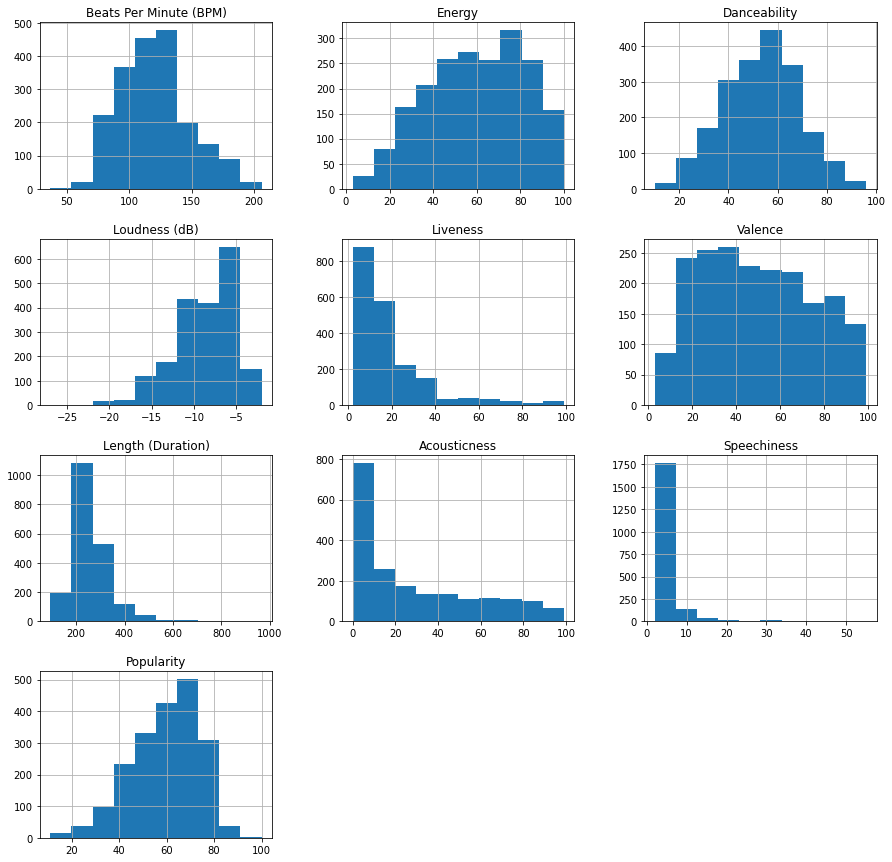

In [73]:
X.hist(figsize=(15,15));

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
# scale your data with the standard scaler
X_prep = StandardScaler().fit_transform(X)

In [76]:
X_prep

array([[ 1.3117595 , -1.3399849 , -0.01845804, ...,  2.2437723 ,
        -0.45315233,  0.7979371 ],
       [ 0.526612  ,  0.8719248 , -0.2141854 , ..., -0.40927136,
         0.45497775, -1.4314694 ],
       [ 1.7043332 ,  0.42051464,  0.8296939 , ..., -0.92609805,
         2.7253027 ,  0.6585992 ],
       ...,
       [ 1.7043332 ,  0.91706586, -0.01845804, ...,  1.5546702 ,
         0.45497775,  1.006944  ],
       [ 1.9184644 , -1.520549  , -0.54039764, ...,  0.8655679 ,
        -0.22611982,  0.37992334],
       [ 0.45523492, -0.43716466, -0.27942786, ...,  1.5546702 ,
        -0.45315233, -0.24709722]], dtype=float32)

In [77]:
X.columns

Index(['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

In [78]:
# create a dataframe of scaled features
X_prep_df = pd.DataFrame(X_prep, columns=X.columns)

X_prep_df.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1.311759,-1.339985,-0.018458,-1.372476,-0.478469,0.746744,-0.731223,2.243772,-0.453152,0.797937
1,0.526612,0.871925,-0.214185,-0.548742,-0.118532,1.270075,-0.657315,-0.409271,0.454978,-1.431469
2,1.704333,0.420515,0.829694,0.000414,-0.718427,0.102643,0.993307,-0.926098,2.725303,0.658599
3,1.882776,1.639322,-0.670883,1.373304,-0.958385,-0.501201,0.106406,-0.995008,-0.226120,1.146282
4,-0.508355,1.007348,0.307754,1.098726,-0.538459,1.511613,-0.053729,-0.960553,-0.453152,-0.038090


In [79]:
X_prep_df.shape

(1990, 10)

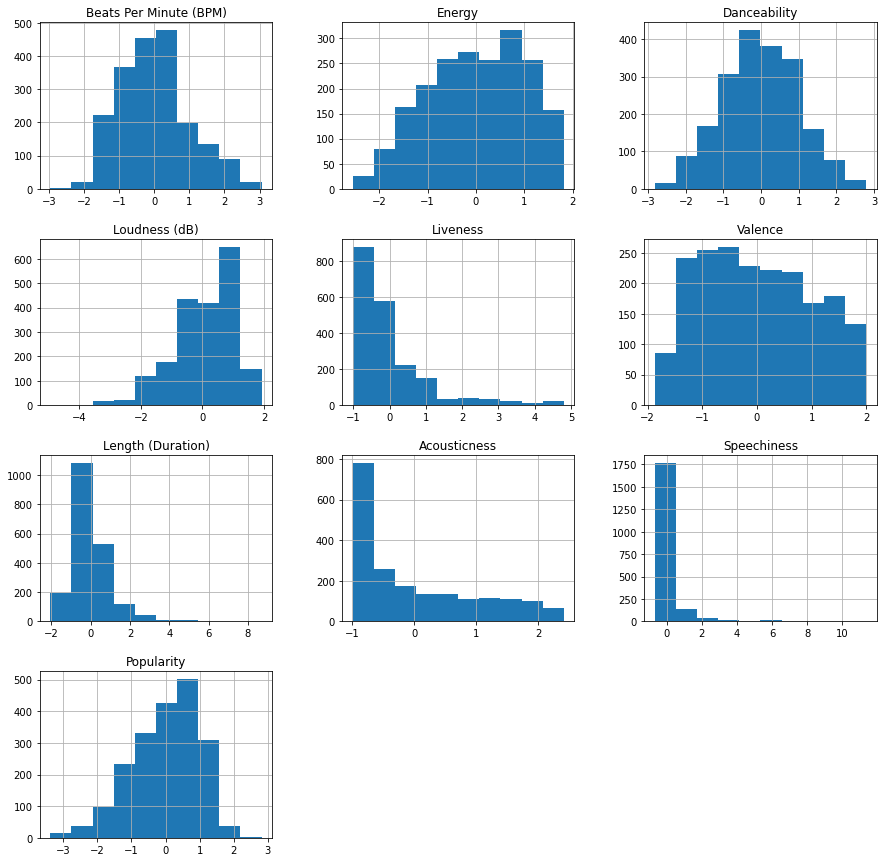

In [80]:
X_prep_df.hist(figsize=(15,15));

KMeans

In [81]:
from sklearn.cluster import KMeans

#define the model, fit the model to your data 

kmeans = KMeans(n_clusters=8, random_state=40)
kmeans.fit(X_prep)

KMeans(random_state=40)

In [82]:
#look at the cluster centres 
kmeans.cluster_centers_

array([[-7.9521012e-01,  6.1541931e-03, -3.8529292e-01,  3.0348590e-01,
        -1.3286918e-01, -5.6601596e-01, -9.8856628e-02, -3.2085821e-01,
        -2.7752343e-01, -3.9695120e-01],
       [-1.3814752e-01, -1.3719648e+00, -4.7159979e-01, -1.0230811e+00,
        -2.7921245e-01, -8.3136803e-01, -1.8499880e-01,  1.4835067e+00,
        -3.1520075e-01, -1.4534639e-01],
       [-6.8712644e-02,  8.9495599e-01,  7.0819640e-01,  7.4569690e-01,
        -1.4806773e-01,  8.9647251e-01, -2.4198817e-01, -5.2485418e-01,
        -4.3103818e-02,  4.6629864e-01],
       [-1.5463224e-01, -3.2402644e-01,  9.1186631e-01, -6.8429309e-01,
        -3.0286697e-01,  8.6190742e-01, -2.8863010e-01,  2.9906326e-03,
        -1.7510937e-01, -2.4421129e-02],
       [-2.3243930e-02,  4.5606819e-01, -2.3785743e-01,  2.1667451e-01,
         3.2026577e+00,  2.3053722e-01, -3.7050631e-02,  7.2391415e-03,
         2.5607312e-01, -4.7521687e-01],
       [ 2.6149726e-01,  4.5920697e-01,  7.0270413e-01,  4.4660321e-01,
   

In [83]:
# Predicting / assigning the clusters:
clusters=kmeans.predict(X_prep)

In [84]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    318
1    367
2    392
3    316
4    113
5     56
6    113
7    315
dtype: int64

In [85]:
# Explore the cluster assignment by placing it in the original dataset
X_cluster=pd.DataFrame(X)
X_cluster['cluster']=clusters
X_cluster.head(10)

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,cluster
0,157.0,30.0,53.0,-14.0,11.0,68.0,201.0,94.0,3.0,71.0,1
1,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,39.0,3
2,168.0,69.0,66.0,-9.0,7.0,52.0,341.0,2.0,17.0,69.0,5
3,173.0,96.0,43.0,-4.0,3.0,37.0,269.0,0.0,4.0,76.0,7
4,106.0,82.0,58.0,-5.0,10.0,87.0,256.0,1.0,3.0,59.0,2
5,99.0,46.0,54.0,-9.0,14.0,14.0,247.0,0.0,2.0,45.0,0
6,102.0,71.0,71.0,-6.0,13.0,54.0,257.0,6.0,3.0,74.0,2
7,137.0,96.0,37.0,-5.0,12.0,21.0,366.0,0.0,14.0,69.0,7
8,148.0,92.0,36.0,-4.0,10.0,23.0,223.0,0.0,8.0,77.0,7
9,112.0,67.0,91.0,-3.0,24.0,66.0,290.0,0.0,7.0,82.0,2


In [86]:
X_cluster.shape

(1990, 11)

In [87]:
# checking total inertia of all the centroids:

kmeans.inertia_

10669.5224609375

In [88]:
#changing parameters to look for the lowest inertia

In [89]:
# Try to run Kmeans with all values of K, from 2 to 20
K = range(2, 20)

# For each model, store the inertia in a list
inertia = []

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[16304.318359375, 14799.40234375, 13616.388671875, 12817.353515625, 11810.736328125, 11217.1650390625, 10669.5224609375, 10255.06640625, 9861.7236328125, 9583.6083984375, 9311.0673828125, 9118.7802734375, 8952.6669921875, 8797.134765625, 8616.5029296875, 8485.03125, 8329.8408203125, 8194.599609375]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

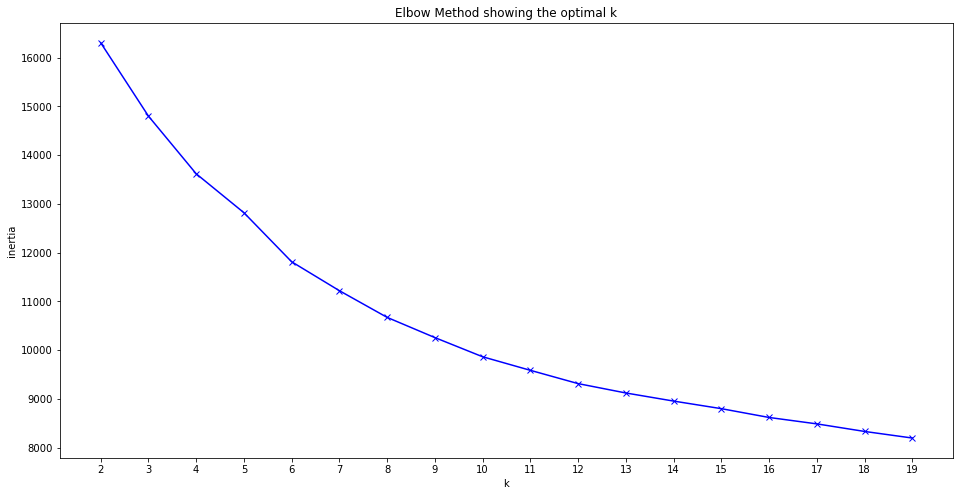

In [90]:
# Plot the results: Elbow method
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [91]:
# Silhouette method
from sklearn.metrics import silhouette_score

K = range(2, 20)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

Text(0, 0.5, 'silhouette score')

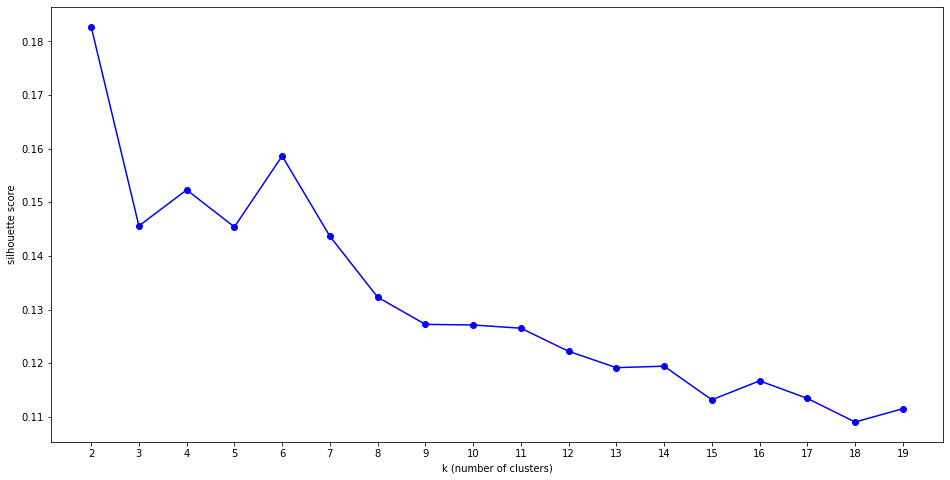

In [92]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

In [93]:
# Comparing Elbow method and Silhouette we think k = 16 is a good one

In [94]:
kmeans = KMeans(n_clusters=16,
                init="random",
                n_init=10,  
                max_iter=200,
                tol=0,
                algorithm="full",
                random_state=40)
kmeans.fit(X_prep)
print(kmeans.inertia_)

8631.5107421875


In [95]:
kmeans = KMeans(n_clusters=8, random_state=40)
kmeans.fit(X_prep)
print(kmeans.inertia_)

10669.521484375


In [96]:
kmeans

KMeans(random_state=40)

In [97]:
kmeans.predict(X_prep)

array([1, 3, 5, ..., 2, 1, 3], dtype=int32)

In [98]:
test=kmeans.predict(X_prep)

In [99]:
X['cluster'] = test.tolist()

In [100]:
X

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,cluster
0,157.0,30.0,53.0,-14.0,11.0,68.0,201.0,94.0,3.0,71.0,1
1,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,39.0,3
2,168.0,69.0,66.0,-9.0,7.0,52.0,341.0,2.0,17.0,69.0,5
3,173.0,96.0,43.0,-4.0,3.0,37.0,269.0,0.0,4.0,76.0,7
4,106.0,82.0,58.0,-5.0,10.0,87.0,256.0,1.0,3.0,59.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1989,94.0,21.0,70.0,-12.0,11.0,72.0,128.0,84.0,7.0,63.0,3
1990,175.0,76.0,36.0,-8.0,76.0,95.0,136.0,73.0,6.0,69.0,4
1991,168.0,80.0,53.0,-9.0,31.0,97.0,162.0,74.0,7.0,74.0,2
1992,174.0,26.0,45.0,-13.0,7.0,60.0,324.0,54.0,4.0,65.0,1


In [101]:
X.shape

(1990, 11)

In [ ]:
# song = input("What song do you like? ")

In [ ]:
# results = sp.search(q='Sunrise', limit=50)

In [ ]:
# results

In [105]:
user_song = input("What song do you like? ")

What song do you like? Hungry Like the Wolf - 2009 Remaster


In [106]:
user_artist = input("from which artist? ")

from which artist? Duran Duran


In [107]:
def art_id(artist_name):
    return sp.search(q=artist_name, limit=1)['tracks']['items'][0]['artists'][0]['id']

In [145]:
art_id('Dire Straits')

'0WwSkZ7LtFUFjGjMZBMt6T'

In [146]:
# Duran Duran id: 0lZoBs4Pzo7R89JM9lxwoT
# Dire Straits id: 0WwSkZ7LtFUFjGjMZBMt6T


In [114]:
#Duran_id=art_id(user_artist)

In [ ]:
def song_from_art_id(artist_id):
    return sp.search(q=artist_id, limit=1)['tracks']['items'][0]['artists'][0]['id']

In [116]:
results = sp.artist_top_tracks(Duran_id)

In [126]:
results['tracks'][9]['name']

'INVISIBLE'

In [120]:
for track in results['tracks'][:15]:
    print('track    : ' + track['name'])

track    : Hungry Like the Wolf - 2009 Remaster
track    : Ordinary World
track    : Come Undone
track    : Save a Prayer - 2009 Remaster
track    : Girls on Film - 2010 Remaster
track    : Rio - 2009 Remaster
track    : A View to a Kill
track    : The Reflex - Single Version; 2010 Remaster
track    : The Wild Boys - Live at Oakland Coliseum, Oakland, CA, 14/04/1984; 2004 Remaster
track    : INVISIBLE


In [127]:
#we see it only returns the top 10 songs.
#In order to get all the tracks we need to get all the albums 1st

results = sp.artist_albums(Duran_id, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])



Thanksgiving Tour - The Ultra Chrome, Latex & Steel Tour (Live)
Paper Gods
Paper Gods (Deluxe Edition)
A Diamond In The Mind
A Diamond in the Mind
A Diamond In The Mind (Live At The MEN Arena,Manchester, England / 2011)
All You Need Is Now
All You Need Is Now
All You Need Is Now
All You Need Is Now
All You Need Is Now
All You Need Is Now
All You Need Is Now
Red Carpet Massacre
Red Carpet Massacre
Red Carpet Massacre
Red Carpet Massacre
Red Carpet Massacre
Red Carpet Massacre
Astronaut
Astronaut
Pop Trash
Pop Trash
Strange Behaviour
Medazzaland
Medazzaland
Thank You
Duran Duran
Liberty
Big Thing
Big Thing (Deluxe Edition)
Notorious
Notorious (Deluxe Edition)
Arena
Seven and the Ragged Tiger
Seven and the Ragged Tiger (Deluxe Edition)
Rio (2001 Remaster)
Rio (Collector's Edition)
Duran Duran
Duran Duran (Deluxe Edition)


In [ ]:
# https://open.spotify.com/album/07pcKsSMVhuLOmSz4DKR32?si=SK5mFM-kS1emJAE9u_FjhA&dl_branch=1

In [150]:
results = sp.artist_albums('0WwSkZ7LtFUFjGjMZBMt6T', album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['id'])

3uRt8lwpMAqYT8l9iwXehh
4HOYpYeunF6WdgU07SHRi4
3ZhilC8BGSZOSydzsDcVfE
3tybckgVqaIsR5oGnfWKpA
7gk5j9Ok764TbTsmkxthYt
0ORgLm6BMFVpLGS4Q5SKMZ
6Pz06FAaeym0JSqVqIkN56
7jvcSnCnugLcisBCNBm60s
0u7sgzvlLmPLvujXxy9EeY
7JLiApdEm6DhYEdK3cop0v
3Iz3o8owPasr8PKUSZPqD5
4hJqOIahWodpSJU6uDgjvN
3wvclpO3LJmpSQGQ9gBa2a
7yTjsInNdNQJAlXAboi1nh
2xQBCPq2gQ7l8thLUUZSKu
6HEOoO8aHq5M88OA4teVY1
4dKdxly4ji1vfl7sEYuqBe
2rCS6Xwx32V27pvgFzLzlT


In [143]:
# function to get all albums ids:


#results = sp.artist_albums(Duran_id, album_type='album')
#albums = results['items']
#while results['next']:
#    results = sp.next(results)
#    albums.extend(results['items'])

#for album in albums:
#    print(album['id'])



def album_ids_from_artists_ids(artist_ids):
    album_ids = []
    for i in artist_ids:
        results = sp.artist_albums(Duran_id, album_type='album')
        albums = results['items']
        
        while results['next']:
            results = sp.next(results)
            albums.extend(results['items'])
        
        for album in albums:
            print(album['id'])

#results = sp.artist_albums(Duran_id, album_type='album')
#albums = results['items']
#while results['next']:
#    results = sp.next(results)
#    albums.extend(results['items'])

#for album in albums:
#    print(album['id'])

In [139]:
# album_tracks(album_id, limit=50, offset=0, market=None)
#getting all tracks from an album

def tracks_from_album(album_id):
    album_tracks = []
    for i in album_id:
        tracks_info = sp.album_tracks(i)
        print(tracks_info)
        
        tracks =  tracks_info['items']
        
        while tracks_info['next']:
            tracks_info = sp.next(tracks_info)
            tracks.extend(tracks_info['items'])
        album_tracks.extend(tracks)
        
    return album_tracks
        

In [147]:
album_ids_from_artists_ids(['0lZoBs4Pzo7R89JM9lxwoT' , '0WwSkZ7LtFUFjGjMZBMt6T'])

07pcKsSMVhuLOmSz4DKR32
2Pvbc55bvFduWqHUUWR0oP
5Mg8II19DRd8u88AJXt7zS
0WU0qRZDrNyHwOdjydC2bz
6qmPuUWbicNkG5pFftV81l
2Vc0Xye5VsrBhK2PIqMYdq
4wZK4hmMRl3GmGOWu24meb
62GV3Divn33jdmGTbsAbI9
274KNZ7vvFdHHiCt9APKlP
59Q3eHMD0st972JU17xYHa
1EyJMLZ4RZCC8pvfNoleXs
5c7w1NIAVMDXI74c7swQp1
08n6X3olBcSEgFYvicf11S
3vihqEZAI2vnAUfhZ9QSSg
3vYbh9avf3cXQISEZa7gWk
7I7gJPIDgmdaMnHlUJi9AO
7a1fHsFj4oYVkMtYMzjOXy
06hfDTofEpRJmAJAwqBaCI
3CKE8XZbP1DyHHkt5MO9Xj
75rfhN25yK4vx65OleViI5
5O47KmqEB2QQHBpoNUstCD
1DBR1uSih7hjib3aWr8XWq
6tl72Z0Fug1gty6JBcPn7z
0bnQn3H0AVAxnJS449E3wl
1rMGT0Sj0aFPvZxIvoNYfp
45nhj07rdso2hymy6daiJW
2XIlp6UgHAQYNg3OTtoD54
0PqCkTvKFJxzr9uujq7a3T
6xt4fhJG5VevU7fVmqvlO7
465PVMr4BYZ6xeact4eTl1
0B4DCGPrG4XEZy19d73LYM
0XDQSfVgj5DM0P6w9qKQqP
3xXwaj6hVwx0pnLtMCHZdC
2KAC3bWcF023kRkPUD4X1D
1A1AKj7tAopU9MIZgWdSP9
0jBIq5EY9zRBZJuCE9iuM1
7HVP879lmeHoVCMZINTDlj
02tfQwJSOLP77oCd9U8bqm
7rCjItVh49HVMaHqxFKPRZ
2Tc7ILGF89w1PWOhzuZlqB
07pcKsSMVhuLOmSz4DKR32
2Pvbc55bvFduWqHUUWR0oP
5Mg8II19DRd8u88AJXt7zS
0WU0qRZDrNy

In [141]:
len(all_songs_album)

31

In [140]:
all_songs_album = tracks_from_album(['07pcKsSMVhuLOmSz4DKR32','2Pvbc55bvFduWqHUUWR0oP'])

{'href': 'https://api.spotify.com/v1/albums/07pcKsSMVhuLOmSz4DKR32/tracks?offset=0&limit=50', 'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0lZoBs4Pzo7R89JM9lxwoT'}, 'href': 'https://api.spotify.com/v1/artists/0lZoBs4Pzo7R89JM9lxwoT', 'id': '0lZoBs4Pzo7R89JM9lxwoT', 'name': 'Duran Duran', 'type': 'artist', 'uri': 'spotify:artist:0lZoBs4Pzo7R89JM9lxwoT'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV'

In [134]:
#tracks_from_album(['07pcKsSMVhuLOmSz4DKR32','2Pvbc55bvFduWqHUUWR0oP'])

In [109]:
# Hungry Like the Wolf - 2009 Remaster

In [110]:
results_ann = sp.search(q='Sunrise', limit=50)

In [111]:
results = sp.search(q="Ella Fitzgerald", limit=50)

In [112]:
results = sp.search(q="Ella Fitzgerald", limit=50)

In [113]:
user_song = input()
sp.search(user_song, limit = 1) # get id, with the id, get audiofeatures
user_af
cluster_user = kmeans.predict(user_af)
df[df["Cluster"]==cluster_user]

i


NameError: name 'user_af' is not defined